# Step 3: Exploratory Data Analysis (EDA)

This notebook explores customer purchasing behavior and sales patterns using visual analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### LOAD CLEANED DATA

In [3]:
df = pd.read_csv('../data/cleaned_online_retail.csv')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
df.shape

(392692, 9)

In [5]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865,22.631500
std,13087.063759,180.492832,22.241836,1713.539549,311.099224
min,536365.000000,1.000000,0.001000,12346.000000,0.001000
25%,549234.000000,2.000000,1.250000,13955.000000,4.950000
50%,561874.000000,6.000000,1.950000,15150.000000,12.450000
75%,572061.000000,12.000000,3.750000,16791.000000,19.800000
max,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000


### PLOT 1 - TOP 10 COUNTRIES BY NUMBER OF TRANSACTIONS

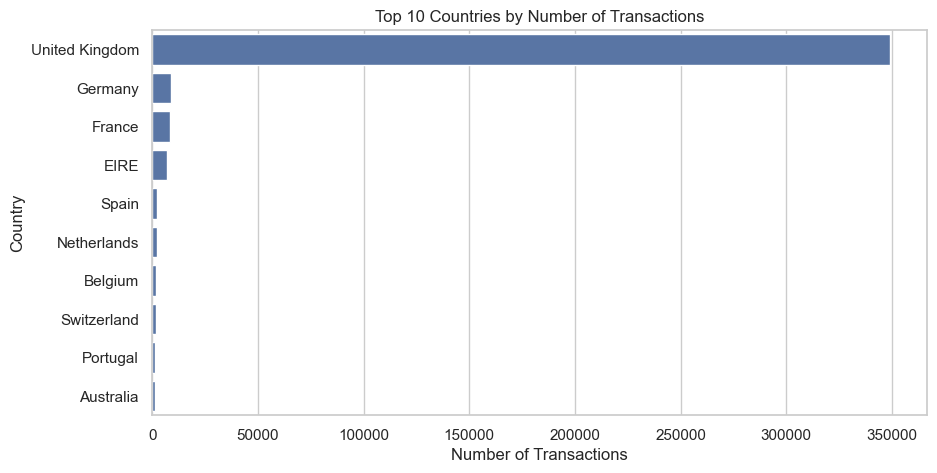

In [6]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()


### PLOT 2 - TOP 10 SELLING PRODUCTS

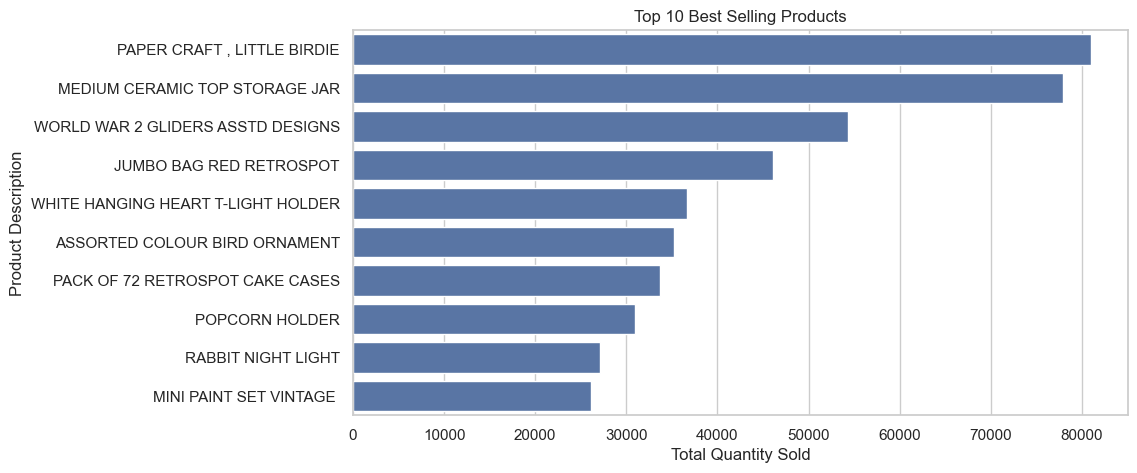

In [7]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()


### PLOT 3 - DISTRIBUTION OF TOTAL PRICE

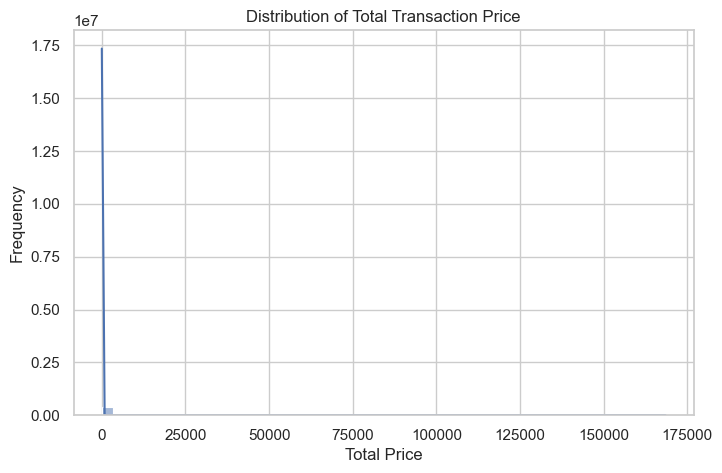

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title("Distribution of Total Transaction Price")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()


### PLOT 4 - SALES OVER TIME

C:\Users\prajj\AppData\Local\Temp\ipykernel_26340\3444220631.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()


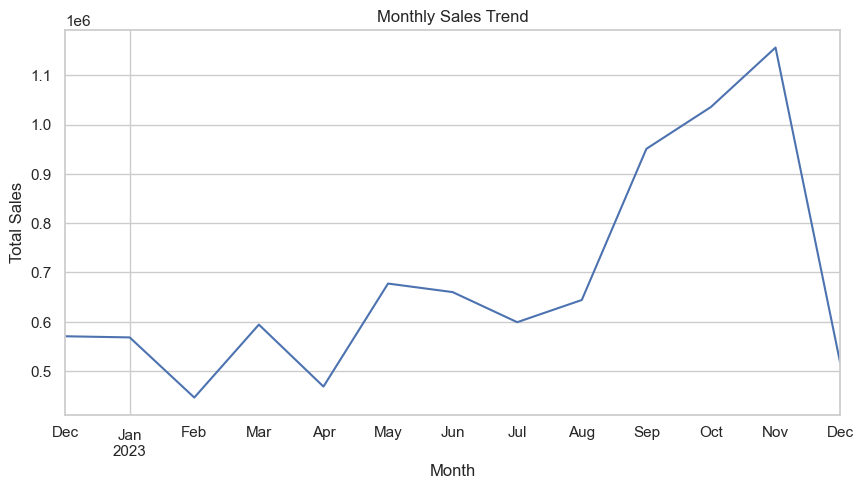

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


### PLOT 5 - CUSTOMER PURCHASE FREQUENCY

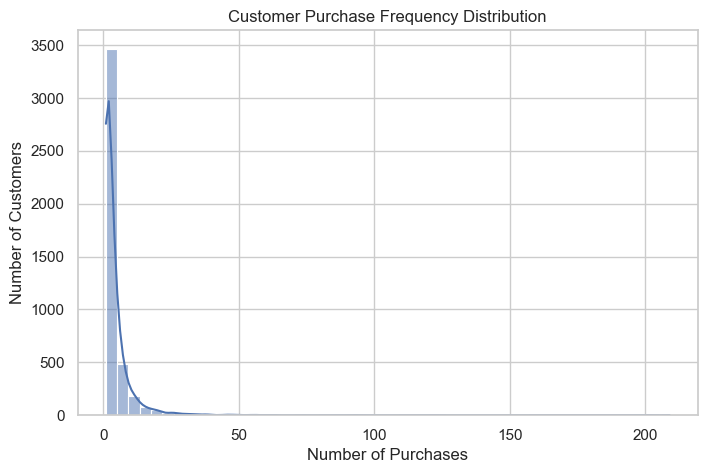

In [10]:
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(8,5))
sns.histplot(customer_freq, bins=50, kde=True)
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


### PLOT 6 - PAIR PLOT

In [11]:
num_df = df[['Quantity', 'UnitPrice', 'TotalPrice']]
num_df.head()


,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


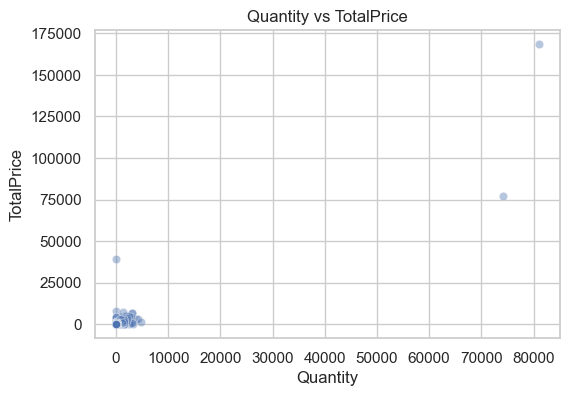

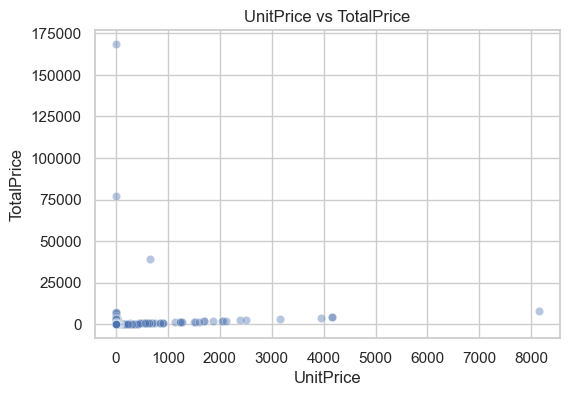

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Quantity', y='TotalPrice', data=num_df, alpha=0.4)
plt.title("Quantity vs TotalPrice")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='UnitPrice', y='TotalPrice', data=num_df, alpha=0.4)
plt.title("UnitPrice vs TotalPrice")
plt.show()


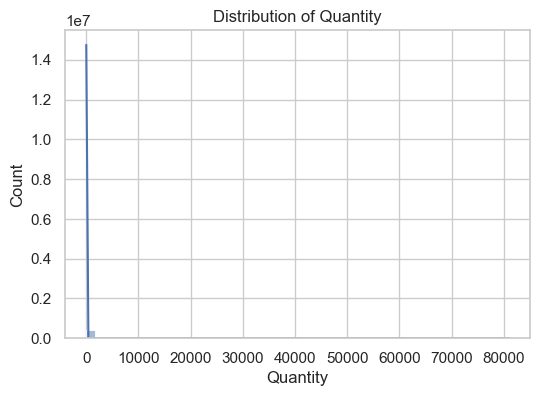

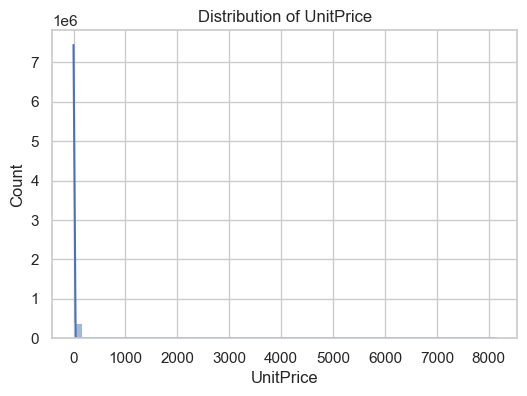

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(num_df['Quantity'], bins=50, kde=True)
plt.title("Distribution of Quantity")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(num_df['UnitPrice'], bins=50, kde=True)
plt.title("Distribution of UnitPrice")
plt.show()


### Pair Plot Observations

- Quantity and TotalPrice show a positive relationship.
- UnitPrice contributes significantly to TotalPrice variations.
- Distributions are skewed, indicating the presence of outliers.


### PLOT 7 - CORRELATION HEATMAP

In [14]:
corr_matrix = num_df.corr()
corr_matrix


,Quantity,UnitPrice,TotalPrice
Quantity,1.000000,-0.004578,0.914451
UnitPrice,-0.004578,1.000000,0.081619
TotalPrice,0.914451,0.081619,1.000000


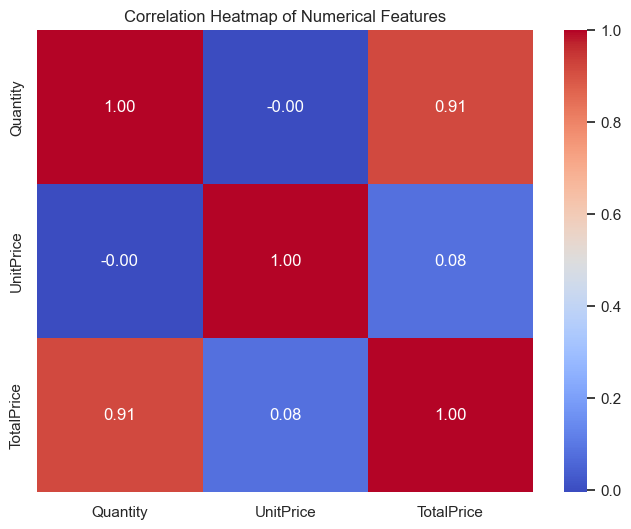

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


### Correlation Heatmap Insights

- TotalPrice has a strong positive correlation with both Quantity and UnitPrice.
- Quantity and UnitPrice show weak correlation, indicating independent effects.
- Correlation analysis supports the use of these features for customer segmentation.
